In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord,Galactocentric,CartesianDifferential
import astropy.units as u
import astropy.coordinates as coord
import h5py
%matplotlib inline

In [212]:
# mg,bp_rp,ra,dec,parallax,phot_g_mean_mag
#data = np.genfromtxt('/Users/nondh/Downloads/full_4kpc-result.csv', skip_header=1,delimiter=',')
#data = np.loadtxt('/Users/nondh/Downloads/full_4kpc-result.csv', skiprows=1,delimiter=',')
#data = np.loadtxt('/Users/nondh/Downloads/sample_50000-result.csv', skiprows=1,delimiter=',')
def read_real_data():
    data1 = np.loadtxt('/Users/nondh/Downloads/full_4kpc-result.csv', skiprows=1,delimiter=',')
    data2 = np.loadtxt('frontside_100pc-result.csv', skiprows=1,delimiter=',')
    data = np.vstack((data1, data2))
    c = coord.ICRS(ra=data[:,2] * u.degree,
                dec=data[:,3] * u.degree,
                distance=(1./data[:,4]) * u.kpc)

    gcentric = c.transform_to(coord.Galactocentric(galcen_v_sun = coord.CartesianDifferential((11.1, -232.24, 7.25)*u.km/u.s)))
    gcentric.representation = 'cylindrical'
    
    n = np.append(np.where((gcentric.phi > 175*u.deg))[0], np.where((gcentric.phi < -175*u.deg))[0])
    gcentric = gcentric[n]
    return gcentric, (data[:,:2])[n]

In [236]:
def pick_subgroup(gcentric, dat, minmag=2.5, maxmag=3, gmin=5):
    return gcentric[np.where((dat[:,0]>gmin) & (dat[:,1] > minmag) & (dat[:,1] < maxmag))]

In [214]:
gcentric, dat = read_real_data()

In [225]:
print len(gcentric), len(dat)

16452345 16452345


In [237]:
g_sub = pick_subgroup(gcentric, dat)

In [238]:
len(g_sub)

1241211

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, -232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    [(7.00110693, -179.41186782, -1.32439469),
     (7.71913595, -179.8094146 , -0.581499  ),
     (8.78466438, -177.56685867, -0.23079826), ...,
     (7.53399351, -179.9957313 , -0.51258861),
     (7.64089951, -179.99862079, -0.42453363),
     (7.97327681, -179.99772466, -0.20310101)]>

8290458

# Read in the data from mock catalogue

using m12f lsr0

In [ ]:
for i in range(10):
    loc = '/mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/lsr_0/lsr-0-rslice-{}.m12f-res7100-md-sliced-gcat-dr2.hdf5'.format(i)
    f = h5py.File(loc, 'r')
    
    # pick high latitude stars
    i_high = np.where((f['parallax'][:]>0.25) & (f['parallax_over_error'][:] > 10) & ((f['b'][:] > 20) | (f['b'][:] < -20)) )[0]
    
    # pick backside
    i_back = np.where((f['parallax'][:]>0.5) & (f['parallax_over_error'][:] > 10) & (f['b'][:] < 20) & (f['b'][:] > -20) & ((f['l'] >90) | (f['l'] < -90)))[0]
    
    # prick frontside
    i_front = np.where((f['parallax'][:]>10) & (f['parallax_over_error'][:] > 10) & (f['b'][:] < 20) & (f['b'][:] > -20) & (f['l'] <90) & (f['l'] > -90))[0]
    
    i_all = np.append(i_high, i_back)
    i_all = np.append(i_all, i_front)
    
    mock_ra = f['ra'][:][i_all]
    mock_dec = f['dec'][:][i_all]
    mock_parallax = f['parallax'][:][i_all]
    mock_bprp = f['bp_rp'][:][i_all]
    mock_bprp_int = f['bp_rp_int'][:][i_all]
    mock_phot_g_mean_mag = f['phot_g_mean_mag'][:][i_all]
    mock_phot_g_mean_mag_int = f['phot_g_mean_mag_int'][:][i_all]
    
    mock_dist = 1/mock_parallax # in kpc
    mock_G = mock_phot_g_mean_mag - 10 + 5*np.log10(mock_parallax)
    mock_G_int = mock_phot_g_mean_mag_int - 10 + 5*np.log10(mock_parallax)
    
    dat_i = np.column_stack((mock_ra, mock_dec, mock_dist, mock_G, mock_bprp, mock_G_int, mock_bprp_int))
    

In [173]:
f = h5py.File('lsr-2-rslice-0.m12i-res7100-md-sliced-gcat-dr2.hdf5', 'r')

In [174]:
# List all groups
f.keys()

[u'A0',
 u'a_g_bp_val',
 u'a_g_rp_val',
 u'a_g_val',
 u'age',
 u'alpha',
 u'b',
 u'b_true',
 u'bp_g',
 u'bp_g_int',
 u'bp_g_true',
 u'bp_rp',
 u'bp_rp_int',
 u'bp_rp_true',
 u'calcium',
 u'carbon',
 u'dec',
 u'dec_error',
 u'dec_true',
 u'dhel_true',
 u'dmod_true',
 u'e_bp_min_rp_val',
 u'ebv',
 u'feh',
 u'g_rp',
 u'g_rp_int',
 u'g_rp_true',
 u'helium',
 u'l',
 u'l_true',
 u'logg',
 u'lognh',
 u'lum_val',
 u'mact',
 u'magnesium',
 u'mini',
 u'mtip',
 u'neon',
 u'nitrogen',
 u'oxygen',
 u'parallax',
 u'parallax_error',
 u'parallax_over_error',
 u'parallax_true',
 u'parentid',
 u'partid',
 u'phot_bp_mean_mag',
 u'phot_bp_mean_mag_error',
 u'phot_bp_mean_mag_int',
 u'phot_bp_mean_mag_true',
 u'phot_g_mean_mag',
 u'phot_g_mean_mag_error',
 u'phot_g_mean_mag_int',
 u'phot_g_mean_mag_true',
 u'phot_rp_mean_mag',
 u'phot_rp_mean_mag_error',
 u'phot_rp_mean_mag_int',
 u'phot_rp_mean_mag_true',
 u'pmb_true',
 u'pmdec',
 u'pmdec_error',
 u'pmdec_true',
 u'pml_true',
 u'pmra',
 u'pmra_error',
 u'

In [26]:
ii = np.where((f['parallax'][:]>0.25) & (f['parallax_over_error'][:] > 10))[0]

In [38]:
f['parallax'][:][ii]

array([0.42745022, 0.46285138, 0.46899979, ..., 0.6278187 , 0.49750184,
       0.68114689])

In [39]:
mock_ra = f['ra'][:][ii]
mock_dec = f['dec'][:][ii]
mock_parallax = f['parallax'][:][ii]
mock_bprp = f['bp_rp'][:][ii]
mock_bprp_int = f['bp_rp_int'][:][ii]

In [31]:
c_mock = coord.ICRS(ra=mock_ra * u.degree,
                dec=mock_dec * u.degree,
                distance=(1./mock_parallax) * u.kpc)

gcentric_mock = c.transform_to(coord.Galactocentric(galcen_v_sun = coord.CartesianDifferential((11.1, -232.24, 7.25)*u.km/u.s))) 

In [32]:
gcentric_mock.representation = 'cylindrical'
gcentric_mock

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, -232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    [(6.98671051, -148.47173225,  0.34411794),
     (7.52053847, -171.8939422 , -0.33744767),
     (8.83035248,  166.30244513, -0.04274612), ...,
     (8.22858042, -172.33932109,  0.60478393),
     (6.80723819, -174.78165177, -0.23304994),
     (8.87193722,  179.41872878,  0.04906768)]>

# r-z space binning
### 0.1x0.05 kpc

## Real Gaia

In [262]:
# assuming dat's columns are in #r, theta, z
def get_bin_edges():
    r_edges = np.array(range(70,101,1))/10.
    r_edges = r_edges*u.kpc
    z_edges = np.array(range(-100,105,5))/100.
    z_edges = z_edges*u.kpc
    return r_edges, z_edges
    

In [263]:
rr, zz = get_bin_edges()
rr

<Quantity [ 7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,
            8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
            9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
           10. ] kpc>

In [257]:
def pad_withNan(p):
    ii,jj = np.where(p < 1)
    for i, j in zip(ii, jj):
        p[i,j] = np.nan
    return p

In [264]:
def get_hist(gcentric, rr, zz):
    H, e1, e2 = np.histogram2d(gcentric.rho, gcentric.z, bins=(rr, zz))
    H = H.T
    H_new = pad_withNan(H)
    
    fig = plt.figure(figsize=((12,8)))
    ax = fig.add_subplot(1,1,1)
    X, Y = np.meshgrid(e1, e2)
    im = ax.pcolormesh(X, Y, H_new, cmap='gist_heat')
    fig.colorbar(im, ax =ax)
    #return H, e1, e2

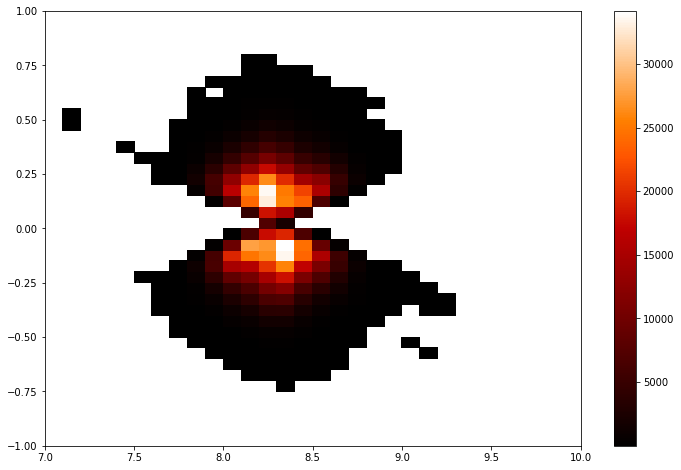

In [265]:
get_hist(g_sub, rr, zz)

## Mock Gaia

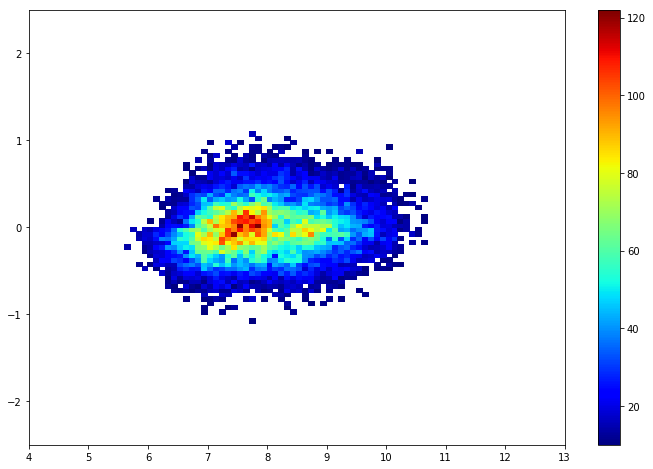

In [185]:
get_hist(gcentric_mock, rr, zz)

In [181]:
gcentric_mock

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, -232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    [(6.98671051, -148.47173225,  0.34411794),
     (7.52053847, -171.8939422 , -0.33744767),
     (8.83035248,  166.30244513, -0.04274612), ...,
     (8.22858042, -172.33932109,  0.60478393),
     (6.80723819, -174.78165177, -0.23304994),
     (8.87193722,  179.41872878,  0.04906768)]>

# MCMC Fit 

In [ ]:
import emcee

In [25]:
def get_bin_edges():
    #r_edges = np.linspace(6.5,10.1,361)*u.kpc
    #z_edges = np.linspace(-2.5,2.5,1001)*u.kpc
    r_edges = np.linspace(6.5,10.1,37)*u.kpc
    z_edges = np.linspace(-2.5,2.5,101)*u.kpc
    return r_edges, z_edges

def get_hist(gcentric):
    rr, zz = get_bin_edges()
    H, e1, e2 = np.histogram2d(gcentric.rho, gcentric.z, bins=(rr, zz))
    
    l = (len(rr)-1) * (len(zz)-1)
    r_array = np.zeros(l)*u.kpc
    z_array = np.zeros(l)*u.kpc
    val = np.zeros(l)
    r_center = 0.5*(rr[1:] + rr[:-1])
    z_center = 0.5*(zz[1:] + zz[:-1])
    k = 0
    for i, r in enumerate(r_center):
        for j, z in enumerate(z_center):
            r_array[k] = r
            z_array[k] = z
            val[k] = H[i,j]
            k += 1
    
    H = H.T

    #H_new = pad_withNan(H)
    #print H_new
    fig = plt.figure(figsize=((12,6)))
    ax = fig.add_subplot(1,1,1)
    X, Y = np.meshgrid(e1, e2)
    im = ax.pcolormesh(X, Y, H, cmap='jet')
    print rr[0], rr[-1]
    ax.set_xlim(6.5, 10.1)
    ax.set_ylim(-2.5,2.5)
    fig.colorbar(im, ax =ax)
    fig.savefig('star_dist.png', dpi=300)
    
    return r_array, z_array, val


def get_volume(rr, zz):
    height = zz[1] - zz[0]
    v = np.zeros(len(rr)-1)
    i = 0
    for r1, r2 in zip(rr[:-1], rr[1:]):
        v[i] = (1/36.) * np.pi * (r2**2 - r1**2) * height
    return v


def fit_func(X, rho, f, l1, h1, l2, h2):
    R, z = X
    return rho* ((np.exp(-R/l1)* np.exp(-z/h1)) + f * (np.exp(-R/l2)* np.exp(-z/h2)))


In [9]:
data_m = np.loadtxt('real_175cut_mstar.txt')

6.5 kpc 10.1 kpc


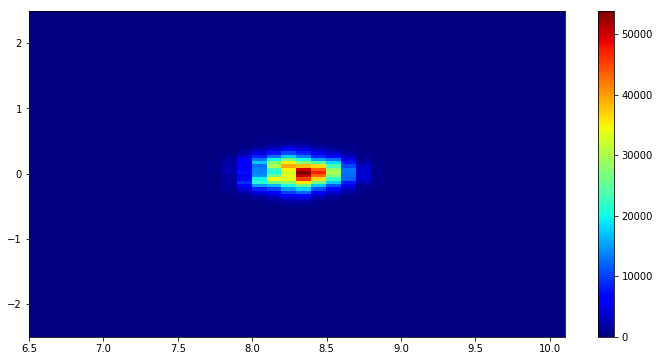

In [27]:
c = coord.ICRS(ra=data_m[:,2] * u.degree,
            dec=data_m[:,3] * u.degree,
            distance=(1./data_m[:,4]) * u.kpc)

gcentric = c.transform_to(coord.Galactocentric)
gcentric.representation = 'cylindrical'
r_array, z_array, val = get_hist(gcentric)

In [30]:
len(np.where(val < 10)[0])

3262

In [32]:
max(val)

53883.0